## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [47]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [49]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [50]:
nb_converted = df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

nb_converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [51]:
df[((df.group == 'treatment') == (df.landing_page == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [52]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

no missing values exist.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
# Removing the rows where the 'landing_page' and 'group' columns don't match
indx = df[((df['group']=='treatment') ==(df['landing_page']=='new_page')) == False].index
df2 = df.drop(indx)

In [54]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [55]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [56]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [57]:
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
df2.drop_duplicates(subset ='user_id',keep ='first',inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [59]:
df2.query('converted == 1').user_id.nunique() / df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [60]:
# Get dataframe with all records from control group
control_df = df2.query('group == "control"')

# Compute click through rate for control group
control_conv_prob = control_df.query('converted == 1').user_id.nunique() / control_df.user_id.nunique()

# Display the probability they converted
print(control_conv_prob)
print('which represents: ',control_df.shape[0] * control_conv_prob, ' user converted.')


0.1203863045004612
which represents:  17489.0  user converted.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [61]:
# Get dataframe with all records from treatment group
treatment_df = df2.query('group == "treatment"')

# Compute click through rate for control group
treatment_conv_prob = treatment_df.query('converted == 1').user_id.nunique() / treatment_df.user_id.nunique()

# Display the probability they converted
print(treatment_conv_prob)
print('which represents: ',treatment_df.shape[0] * treatment_conv_prob, ' user converted.')


0.11880806551510564
which represents:  17264.0  user converted.


d. What is the probability that an individual received the new page?

In [62]:
df2.query('landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**My answer :**
* The probability of the users receive the new or the old page is the same and equal to 50%.
* The Probability of converting regardless of page is: 11.96%
* The probability of converting in the control group is: 12.04% which represents 17489 users in the control group converted.
* The probability of converting in the treatment group is: 11.88% which represents 17264 users in the treatment group converted.


We find that old page has a slightly higher conversion rate than the new page, but by a very tiny margin, therefore we don't have sufficient evidence to conclude that the new treatment page leads to more conversions than the old page.

In other words, we cannot state with certainty that one page leads to more conversions. 

We can confirm our findings by calculate the p-value based on a hypothesis test  for the new and old pages.

We can guess that change aversion, test time duration and/or other potentially influencing factors are not accounted for. So, This is even more important due to almost similar perforamnce of both pages.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypotheses:**

**$H_{0}$**$:$ **$P_{new}$** $−$ **$P_{old}$** $<=0$
 
**$H_{1}$**$:$ **$P_{new}$** $−$ **$P_{old}$** $>0$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [63]:
# As p_old = p_new = converted rate in ab_data.csv regardless of the page
p_new = df2.converted.mean()
p_new


0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [64]:
# As p_old = p_new = converted rate in ab_data.csv regardless of the page
p_old = df2.converted.mean()
p_old


0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [65]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new


145310

d. What is $n_{old}$, the number of individuals in the control group?

In [66]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old


145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [67]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted


17321

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [68]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted


17294

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [69]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff


0.0001563169466537867

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [70]:
p_diffs = []

for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

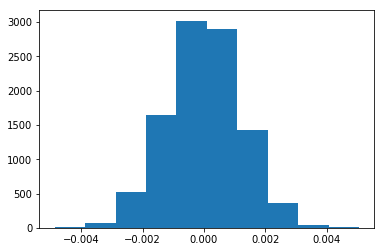

In [71]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
# Calculate the actucl difference observed in ab_data
org_old_mean = df.query('group =="control"').converted.mean()
org_new_mean = df.query('group =="treatment"').converted.mean()
org_diff = org_new_mean - org_old_mean

# Convert p_diffs to array
p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > org_diff).mean()


0.88739999999999997

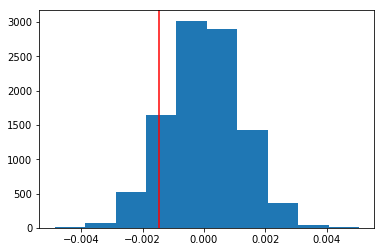

In [73]:
plt.hist(p_diffs);
plt.axvline(x = org_diff, color = 'red');


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**My answer:**

In part (**j.**) we've just computed the **p-value**, this is the probability of observing our statistic where the null hypothesis is true.

As that p-value is greater than **0.05**, we would **fail** to reject the null hypothesis and therefore keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [74]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print(convert_old ,convert_new ,n_old , n_new)


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [75]:
from scipy.stats import norm

#calculate Z-Score and P_value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

#calculate the critical Z_Score
z_critical=norm.ppf(1-(0.05))

print("Z-Score: ",z_score, "\nCritical Z-Score: ", z_critical, "\nP-Value: ", p_value)

Z-Score:  1.31092419842 
Critical Z-Score:  1.64485362695 
P-Value:  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**My answer:**

First, the z_score (**1.31**) is **less than** the critical z_score (**1.64**),
Second, the **P_value > 0.05**,

The two statements above mean that we **fail** to reject the null hypothesis; which makes these findings **consistent** with the results in parts **j.** & **k.**, and that lead to accept the null hypothesis that the coversion rates of the old page are equal or greater than the conversion rates of the new page.

**Conclusion:** the company can take the decision of keeping the old page for theie e-commerce website.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**My answer:**

In this case the appropriate type of regression is: **logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [76]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [77]:
df2['intercept']=1

#df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
#df2.rename(columns = {"treatment": "ab_page"}, inplace=True)

df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])


In [78]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [79]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [80]:
results.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 00:23 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**My answer:**

* The p-value associated with **ab_page** is: **0.1899.**
* The difference between this **P-value** and that which is calculated in **part II** comes from the difference in the null and alternative hypothesis for each other.

In this logistic regression model, our null and alternative hypotheses are as shown below:

* **$H_{0}$**$:$ **$P_{new}$** $=$ **$P_{old}$**
* **$H_{1}$**$:$ **$P_{new}$** $≠$ **$P_{old}$**

Since the P-value (**0.1899**) > the level of significance (**0.05**), we cannot reject the null hypothesis, and we can say, that there isn't a significant difference depending on the page type.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 **My answer:**

Considering other factors is a good idea as these factors **may contribute** to the significance of our test results and leads to more **accurate decisions**. One of the disadvantages of adding additional terms into the regression model is **Simpson's paradox** where the combined impact of different variables disappears or reverses when these variables are combined, but appears where these variables are tested individually.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [81]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [82]:
# Merge the dataframes together
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
#df_new = df2.merge(countries_df, on="user_id", how = "inner")

# Create dummy variables for the countries 
df_new = df_new.join(pd.get_dummies(df_new['country']))

df_new.head(3)


,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0


In [83]:
# Create the Model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']])

# Fitting the Model
results = log_mod.fit()

# Obtaining the Results
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 00:23 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

**My answer:**


Looking at the **P-values** form the results above, we can say, that country also doens't have a significant impact on the coversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [84]:
# Create the necessary additional columns interacting between the ab_page and country columns
df_new["CA_page"]  = df_new["CA"] * df_new["ab_page"] 
df_new["UK_page"] = df_new["UK"] * df_new["ab_page"]

df_new.head(3)


,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1


In [85]:
# Create the Model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK', 'CA_page', 'UK_page']])

# Fitting the Model
results = log_mod.fit()

# Obtaining the Results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 00:23 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

### Conclusions:
* Based on these results, we can see that the **P-values** for the interaction terms are definitely not significant, so we accept the null hypothesis and reject the alternate hypothesis.
* There is no impact on the conversion rate.
* can other factors exist but are not included in our data.
* Based on these results i recommend that the company take the decision of keeping the old page.

## References 
* https://github.com/
* http://www.biostathandbook.com/multiplelogistic.html#:~:text=The%20main%20null%20hypothesis%20of,you%20would%20expect%20by%20chance.
* https://knowledge.udacity.com/


In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0